<a href="https://colab.research.google.com/github/wutcharinth/Data-Science--Cheat-Sheet/blob/master/DSE_DataAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's review [Python Basics](https://colab.research.google.com/drive/1vklSCiRclBri5ghIcavk2J2sCEX3UVf8?usp=sharing&fbclid=IwAR1RPZTOjaOFvfOVRqG8nFtdpw5SOiV_R4KF3yVATo-QtpeMd9JM7y0FMhQ)

In [ ]:
!pip install --upgrade -q pygsheets

     |████████████████████████████████| 112kB 4.8MB/s 


In [ ]:
import google.auth
from google.colab import auth
auth.authenticate_user() #access google
import pygsheets #read googlesheet
import pandas as pd #manage excel like data
import numpy as np #manage numerical data
import seaborn as sns #plot
import matplotlib.pyplot as plt #plot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
credentials, _ = google.auth.default()
gc = pygsheets.client.Client(credentials)

In [ ]:
sheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1cizxcN0EyYJDrX-o04Ptwd6XQUxnJNfmrFgxeVNfgJo/edit?usp=sharing')

In [ ]:
dat = sheet.sheet1.get_as_df()
dat = dat.dropna() #get rid of NaN
dat

,Timestamp,Title,Age,Citizenship,Rate your skills [Python],Rate your skills [Machine learning],What is your expectation from attending this class?,What is your best favorite category to purchase online?,What is your second favorite category to purchase online?,What is you third favorite category to purchase online?
1,7/1/2020 15:21:41,Mr.,23,Singapore,Have used in a project,No Background,to gain skills,Men's Wear,Hobbies & Books,Computers & Peripherals
2,7/1/2020 15:38:09,Ms.,25,Taiwai,Have studied,No Background,get the knowledge about data science,Beauty & Personal Care,Women's Apparel,Food & Beverages
3,7/1/2020 15:38:59,Mr.,18,Singapore,No Background,No Background,Able to understand python,Computers & Peripherals,Mobile & Gadgets,Video Games
4,7/1/2020 15:41:46,Ms.,40,Malaysia,No Background,No Background,Clear about the role,Food & Beverages,Video Games,Jewellery & Accessories
5,7/1/2020 15:47:54,Mr.,23,Singapore,Have studied,Have studied,Learn more about python and machine learning,Food & Beverages,Video Games,Men's Wear
...,...,...,...,...,...,...,...,...,...,...
539,7/5/2020 16:07:19,Mr.,21,Malaysia,No Background,No Background,To learn how to write scripts in python,Men's Wear,Hobbies & Books,Food & Beverages
540,7/5/2020 18:04:25,Ms.,30,Indonesia,Have used in a project,Have used in a project,Learn python for data science,Food & Beverages,Beauty & Personal Care,Hobbies & Books
541,7/5/2020 20:57:21,Ms.,21,Singapore,Have studied,Have used in a project,Knowing more about Python and Numpy for data t...,Women's Apparel,Beauty & Personal Care,Mobile & Gadgets
542,7/6/2020 7:43:49,Mr.,13,Singapore,Have used in a project,Have studied,-,Computers & Peripherals,Men's Wear,Mobile & Gadgets


In [ ]:
sheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1-k6Se4x9TXR5xRxSyzhy2seq-Zl3tYJXlg_IXqZjXfk/edit?usp=sharing')
sheet2 = gc.open_by_url('https://docs.google.com/spreadsheets/d/1vTzYTHkV5I8EXYQ-HrlUBb3mk49rgDa6qhYVNg7xNx4/edit?usp=sharing')

In [ ]:
e1 = sheet.sheet1.get_as_df()['Email Address'].values
e2 = sheet2.sheet1.get_as_df()['Email Address'].values
edat = pd.DataFrame()
edat['Email'] = list(set(list(e1)+list(e2)))
edat.to_excel('email_part2.xlsx')

In [ ]:
dat.columns

Index(['Timestamp', 'Title', 'Age', 'Citizenship', 'Rate your skills [Python]',
       'Rate your skills [Machine learning]',
       'What is your expectation from attending this class?',
       'What is your best favorite category to purchase online?',
       'What is your second favorite category to purchase online?',
       'What is you third favorite category to purchase online?'],
      dtype='object')

In [ ]:
newcol = ['Timestamp', 'Title', 'Age', 'Citizen', 'PythonSkill','MLSkill','Expectation','Fav1','Fav2','Fav3']

In [ ]:
dat.columns = newcol

1                                         to gain skills
2                   get the knowledge about data science
3                              Able to understand python
4                                   Clear about the role
5           Learn more about python and machine learning
                             ...                        
539             To learn how to write scripts in python 
540                        Learn python for data science
541    Knowing more about Python and Numpy for data t...
542                                                    -
543           learn more about how python is used for ds
Name: Expectation, Length: 543, dtype: object

# Expectation

In [ ]:
textList = dat['Expectation'].values
textList[0]

KeyError: ignored

In [ ]:
combinetext = ''
for text in textList:
  combinetext = combinetext + text
combinetext

"to gain skillsget the knowledge about data scienceAble to understand pythonClear about the roleLearn more about python and machine learningLearn more useful functions in Python.More experience in machine learning using pythonSkillup for pythonBasics and Fundamentals of PythonTo get a preliminary understanding of Python and its use in Data Science (e.g. Why particularly Python over other programming languages that makes it so special for data science and ML?)To learn moreSome knowledgePrepare for Shopee competitionTo learn basic pythonKnow more with Machine LearningI want to influence my self and learn something different from my class at university.To learn and reinforce fundamentalsI will be able to master Python for Data Science since I am eagerly to learn it to do some projects given by my college and I hope I can learn it furthermore to make it as part of my career in the futureLearn more pythonTo learn more abt python-LearnLearn and applyLearnA beginner-friendly Data Science clas

In [ ]:
textList = ''.join(textList)
textList

"to gain skillsget the knowledge about data scienceAble to understand pythonClear about the roleLearn more about python and machine learningLearn more useful functions in Python.More experience in machine learning using pythonSkillup for pythonBasics and Fundamentals of PythonTo get a preliminary understanding of Python and its use in Data Science (e.g. Why particularly Python over other programming languages that makes it so special for data science and ML?)To learn moreSome knowledgePrepare for Shopee competitionTo learn basic pythonKnow more with Machine LearningI want to influence my self and learn something different from my class at university.To learn and reinforce fundamentalsI will be able to master Python for Data Science since I am eagerly to learn it to do some projects given by my college and I hope I can learn it furthermore to make it as part of my career in the futureLearn more pythonTo learn more abt python-LearnLearn and applyLearnA beginner-friendly Data Science clas

In [ ]:
import pandas as pd
wordList = textList.split()
wordList

['to',
 'gain',
 'skillsget',
 'the',
 'knowledge',
 'about',
 'data',
 'scienceAble',
 'to',
 'understand',
 'pythonClear',
 'about',
 'the',
 'roleLearn',
 'more',
 'about',
 'python',
 'and',
 'machine',
 'learningLearn',
 'more',
 'useful',
 'functions',
 'in',
 'Python.More',
 'experience',
 'in',
 'machine',
 'learning',
 'using',
 'pythonSkillup',
 'for',
 'pythonBasics',
 'and',
 'Fundamentals',
 'of',
 'PythonTo',
 'get',
 'a',
 'preliminary',
 'understanding',
 'of',
 'Python',
 'and',
 'its',
 'use',
 'in',
 'Data',
 'Science',
 '(e.g.',
 'Why',
 'particularly',
 'Python',
 'over',
 'other',
 'programming',
 'languages',
 'that',
 'makes',
 'it',
 'so',
 'special',
 'for',
 'data',
 'science',
 'and',
 'ML?)To',
 'learn',
 'moreSome',
 'knowledgePrepare',
 'for',
 'Shopee',
 'competitionTo',
 'learn',
 'basic',
 'pythonKnow',
 'more',
 'with',
 'Machine',
 'LearningI',
 'want',
 'to',
 'influence',
 'my',
 'self',
 'and',
 'learn',
 'something',
 'different',
 'from',
 'my',

In [ ]:
def getwordcount(wordList):
  wDic = {}
  for w in wordList:
    #print(w)
    if w in wDic.keys():
      wDic[w] = wDic[w]+1
    else:
      wDic[w] = 1
    #input()
  res = pd.DataFrame()
  res['vocab'] = wDic.keys()
  res['count'] = wDic.values()
  res = res.sort_values(by='count',ascending=False)
  return res

In [ ]:
getwordcount(wordList)

NameError: ignored

In [ ]:
!pip install nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
stop_words = [s.lower() for s in stop_words]
filtered_sentence = [w.lower() for w in wordList if not w in stop_words] 

In [ ]:
getwordcount(filtered_sentence).iloc[0:50]

,vocab,count
8,python,138
3,data,122
34,learn,66
9,machine,51
25,science,45
24,use,42
2,knowledge,36
15,learning,31
5,understand,28
23,understanding,26


(-0.5, 399.5, 199.5, -0.5)

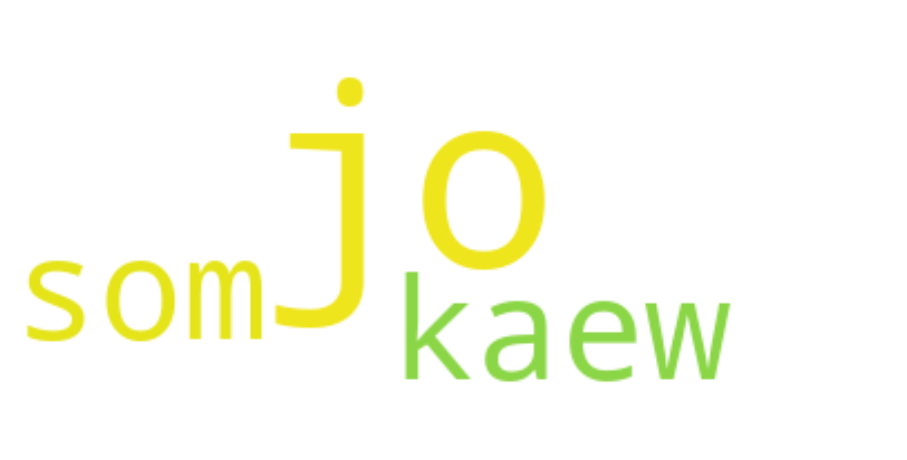

In [ ]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
textList = 'kaew som jo jo jo jo jo jo jo jo'
wordcloud = WordCloud(max_words=100, background_color="white").generate(textList)
plt.figure(figsize = (16, 16))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")

# Skill

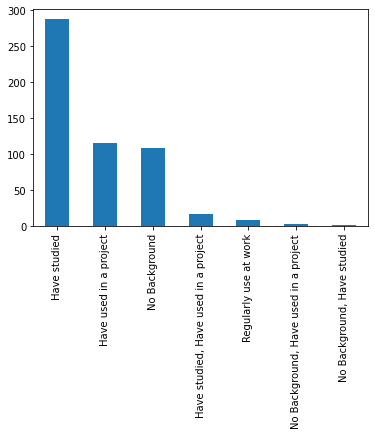

In [ ]:
pythonskill = dat['PythonSkill'].value_counts()
pythonskill.plot.bar()

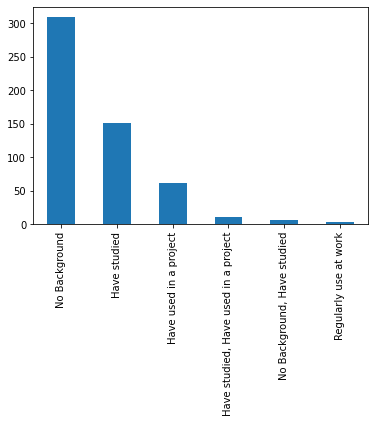

In [ ]:
datascienceskill = dat['MLSkill'].value_counts()
datascienceskill.plot.bar()

# Age

In [ ]:
agedat = dat['Age']
agedat = agedat[agedat!='']

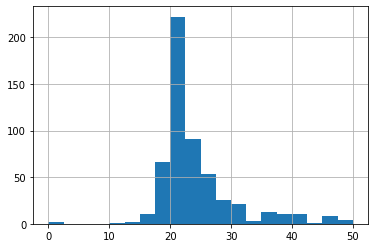

In [ ]:
agedat.hist(bins=20)

In [ ]:
dat['Age'].astype('float')

1      23.0
2      25.0
3      18.0
4      40.0
5      23.0
       ... 
539    21.0
540    30.0
541    21.0
542    13.0
543    22.0
Name: Age, Length: 543, dtype: float64

Get age range

In [ ]:
lb = (dat['Age']/5).astype('int')*5 #lower bound
ub = lb + 5 #upper bound
lb = lb.astype('str')
ub = ub.astype('str')
dat['AgeRange'] = lb + '-' + ub
dat

,Timestamp,Title,Age,Citizen,PythonSkill,MLSkill,Expectation,Fav1,Fav2,Fav3,AgeRange
1,7/1/2020 15:21:41,Mr.,23,Singapore,Have used in a project,No Background,to gain skills,Men's Wear,Hobbies & Books,Computers & Peripherals,20-25
2,7/1/2020 15:38:09,Ms.,25,Taiwai,Have studied,No Background,get the knowledge about data science,Beauty & Personal Care,Women's Apparel,Food & Beverages,25-30
3,7/1/2020 15:38:59,Mr.,18,Singapore,No Background,No Background,Able to understand python,Computers & Peripherals,Mobile & Gadgets,Video Games,15-20
4,7/1/2020 15:41:46,Ms.,40,Malaysia,No Background,No Background,Clear about the role,Food & Beverages,Video Games,Jewellery & Accessories,40-45
5,7/1/2020 15:47:54,Mr.,23,Singapore,Have studied,Have studied,Learn more about python and machine learning,Food & Beverages,Video Games,Men's Wear,20-25
...,...,...,...,...,...,...,...,...,...,...,...
539,7/5/2020 16:07:19,Mr.,21,Malaysia,No Background,No Background,To learn how to write scripts in python,Men's Wear,Hobbies & Books,Food & Beverages,20-25
540,7/5/2020 18:04:25,Ms.,30,Indonesia,Have used in a project,Have used in a project,Learn python for data science,Food & Beverages,Beauty & Personal Care,Hobbies & Books,30-35
541,7/5/2020 20:57:21,Ms.,21,Singapore,Have studied,Have used in a project,Knowing more about Python and Numpy for data t...,Women's Apparel,Beauty & Personal Care,Mobile & Gadgets,20-25
542,7/6/2020 7:43:49,Mr.,13,Singapore,Have used in a project,Have studied,-,Computers & Peripherals,Men's Wear,Mobile & Gadgets,10-15


# Title

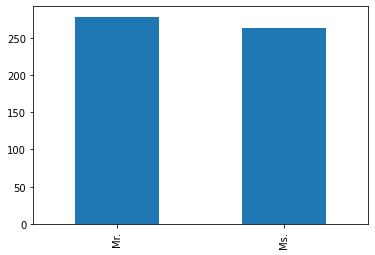

In [ ]:
titledat = dat[(dat['Title']=='Mr.') | (dat['Title']=='Ms.')]['Title'].value_counts()
titledat.plot.bar()

# Citizen

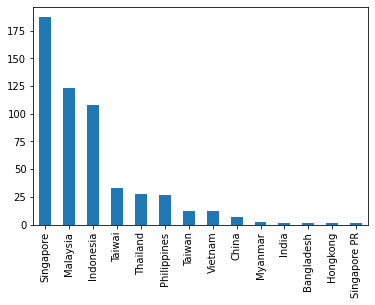

In [ ]:
citizen = dat['Citizen'].value_counts()
citizen.plot.bar()

Citizen X Title

In [ ]:
pd.crosstab(dat['Citizen'],dat['Title'])

Title,Mr.,Ms.
Citizen,,
Bangladesh,1,0
China,1,6
Hongkong,0,1
India,1,0
Indonesia,68,40
Malaysia,51,72
Myanmar,1,1
Philippines,18,9
Singapore,97,90


In [ ]:
citizenXtitle = pd.crosstab(dat['Citizen'],dat['Title'],normalize=0)
citizenXtitle

Title,Mr.,Ms.
Citizen,,
Bangladesh,1.000000,0.000000
China,0.142857,0.857143
Hongkong,0.000000,1.000000
India,1.000000,0.000000
Indonesia,0.629630,0.370370
Malaysia,0.414634,0.585366
Myanmar,0.500000,0.500000
Philippines,0.666667,0.333333
Singapore,0.518717,0.481283


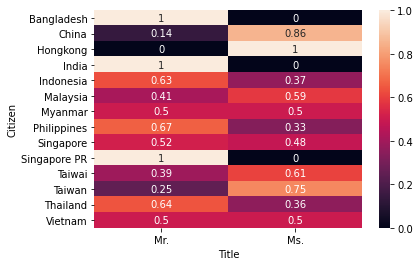

In [ ]:
sns.heatmap(citizenXtitle, annot=True)

Sort before plot makes it look easier

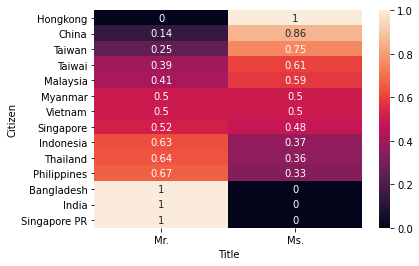

In [ ]:
sns.heatmap(citizenXtitle.sort_values(by='Mr.'),annot=True)

# Categories

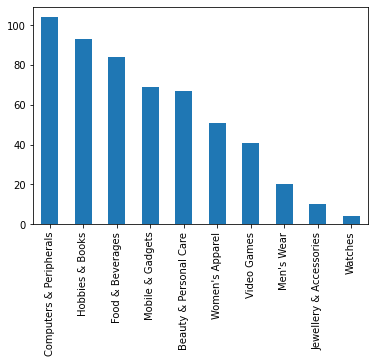

In [ ]:
f1 = dat['Fav1'].value_counts()
f1.plot.bar()

In [ ]:
dat[dat['AgeRange']=='20-25']

,Timestamp,Title,Age,Citizen,PythonSkill,MLSkill,Expectation,Fav1,Fav2,Fav3,AgeRange
1,7/1/2020 15:21:41,Mr.,23,Singapore,Have used in a project,No Background,to gain skills,Men's Wear,Hobbies & Books,Computers & Peripherals,20-25
5,7/1/2020 15:47:54,Mr.,23,Singapore,Have studied,Have studied,Learn more about python and machine learning,Food & Beverages,Video Games,Men's Wear,20-25
6,7/1/2020 16:00:57,Ms.,22,Taiwan,Have studied,No Background,Learn more useful functions in Python.,Hobbies & Books,Beauty & Personal Care,Food & Beverages,20-25
7,7/1/2020 16:09:39,Mr.,21,Singapore,Have studied,No Background,More experience in machine learning using python,Hobbies & Books,Mobile & Gadgets,Food & Beverages,20-25
8,7/1/2020 16:10:44,Mr.,22,Indonesia,Have studied,Have studied,Skillup for python,Hobbies & Books,Computers & Peripherals,Mobile & Gadgets,20-25
...,...,...,...,...,...,...,...,...,...,...,...
537,7/5/2020 14:14:42,Ms.,22,Taiwai,Have used in a project,Have studied,To have a better idea in How it works in Pyth...,Hobbies & Books,Beauty & Personal Care,Women's Apparel,20-25
538,7/5/2020 14:24:58,Ms.,24,Taiwan,Have used in a project,No Background,agility between Numpy and Pandas,Beauty & Personal Care,Food & Beverages,Women's Apparel,20-25
539,7/5/2020 16:07:19,Mr.,21,Malaysia,No Background,No Background,To learn how to write scripts in python,Men's Wear,Hobbies & Books,Food & Beverages,20-25
541,7/5/2020 20:57:21,Ms.,21,Singapore,Have studied,Have used in a project,Knowing more about Python and Numpy for data t...,Women's Apparel,Beauty & Personal Care,Mobile & Gadgets,20-25


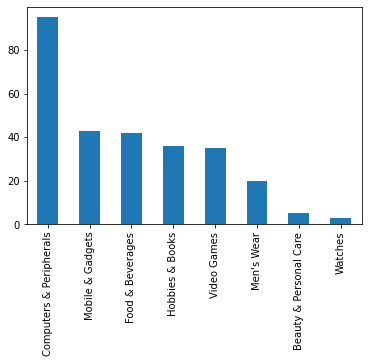

In [ ]:
mrdat = dat[dat['Title']=='Mr.']
f1mr = mrdat['Fav1'].value_counts()
f1mr.plot.ba

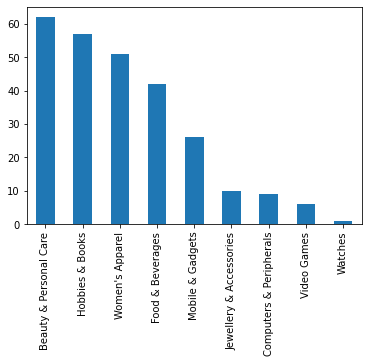

In [ ]:
msdat = dat[dat['Title']=='Ms.'].dropna()
f1ms = msdat['Fav1'].value_counts()
f1ms.plot.bar()

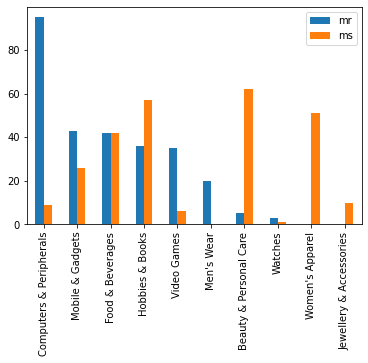

In [ ]:
labels = range(18)
sf1 = pd.concat([f1mr,f1ms],axis=1)
sf1
sf1.columns = ['mr','ms']
#sf1
sf1.plot.bar()

AgeRange X Categories

In [ ]:
pd.crosstab(mrdat['AgeRange'],mrdat['Fav1'])

Fav1,Beauty & Personal Care,Computers & Peripherals,Food & Beverages,Hobbies & Books,Men's Wear,Mobile & Gadgets,Video Games,Watches
AgeRange,,,,,,,,
10-15,0,1,0,0,0,0,0,0
15-20,0,18,9,3,1,4,8,0
20-25,3,37,13,22,15,31,22,2
25-30,1,18,9,3,3,5,4,1
30-35,1,9,4,0,1,1,1,0
35-40,0,8,0,4,0,1,0,0
40-45,0,0,3,2,0,1,0,0
45-50,0,4,2,0,0,0,0,0
50-55,0,0,2,2,0,0,0,0


In [ ]:
pd.crosstab(mrdat['AgeRange'],mrdat['Fav1'],normalize=1)

Fav1,Beauty & Personal Care,Computers & Peripherals,Food & Beverages,Hobbies & Books,Men's Wear,Mobile & Gadgets,Video Games,Watches
AgeRange,,,,,,,,
10-15,0.0,0.010526,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
15-20,0.0,0.189474,0.214286,0.083333,0.05,0.093023,0.228571,0.000000
20-25,0.6,0.389474,0.309524,0.611111,0.75,0.720930,0.628571,0.666667
25-30,0.2,0.189474,0.214286,0.083333,0.15,0.116279,0.114286,0.333333
30-35,0.2,0.094737,0.095238,0.000000,0.05,0.023256,0.028571,0.000000
35-40,0.0,0.084211,0.000000,0.111111,0.00,0.023256,0.000000,0.000000
40-45,0.0,0.000000,0.071429,0.055556,0.00,0.023256,0.000000,0.000000
45-50,0.0,0.042105,0.047619,0.000000,0.00,0.000000,0.000000,0.000000
50-55,0.0,0.000000,0.047619,0.055556,0.00,0.000000,0.000000,0.000000


In [ ]:
mrtab = pd.crosstab(mrdat['AgeRange'],mrdat['Fav1'],normalize=0)
mrtab

Fav1,Beauty & Personal Care,Computers & Peripherals,Food & Beverages,Hobbies & Books,Men's Wear,Mobile & Gadgets,Video Games,Watches
AgeRange,,,,,,,,
10-15,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
15-20,0.000000,0.418605,0.209302,0.069767,0.023256,0.093023,0.186047,0.000000
20-25,0.020690,0.255172,0.089655,0.151724,0.103448,0.213793,0.151724,0.013793
25-30,0.022727,0.409091,0.204545,0.068182,0.068182,0.113636,0.090909,0.022727
30-35,0.058824,0.529412,0.235294,0.000000,0.058824,0.058824,0.058824,0.000000
35-40,0.000000,0.615385,0.000000,0.307692,0.000000,0.076923,0.000000,0.000000
40-45,0.000000,0.000000,0.500000,0.333333,0.000000,0.166667,0.000000,0.000000
45-50,0.000000,0.666667,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
50-55,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000


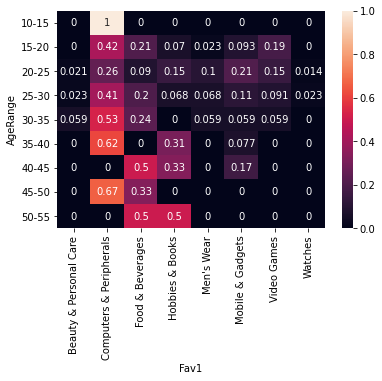

In [ ]:
sns.heatmap(mrtab, annot=True)

In [ ]:
pd.crosstab(msdat['AgeRange'],msdat['Fav1'])

Fav1,Beauty & Personal Care,Computers & Peripherals,Food & Beverages,Hobbies & Books,Jewellery & Accessories,Mobile & Gadgets,Video Games,Watches,Women's Apparel
AgeRange,,,,,,,,,
0-5,0,0,0,1,0,1,0,0,0
10-15,0,0,1,1,0,0,0,0,0
15-20,8,3,5,3,1,4,0,0,10
20-25,38,3,25,38,7,16,4,0,37
25-30,8,2,3,12,2,1,2,1,3
30-35,2,0,5,0,0,0,0,0,0
35-40,3,1,2,1,0,2,0,0,1
40-45,3,0,1,1,0,0,0,0,0
45-50,0,0,0,0,0,2,0,0,0


In [ ]:
mstab = pd.crosstab(msdat['AgeRange'],msdat['Fav1'],normalize=0)
mstab

Fav1,Beauty & Personal Care,Computers & Peripherals,Food & Beverages,Hobbies & Books,Jewellery & Accessories,Mobile & Gadgets,Video Games,Watches,Women's Apparel
AgeRange,,,,,,,,,
0-5,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000
10-15,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
15-20,0.235294,0.088235,0.147059,0.088235,0.029412,0.117647,0.000000,0.000000,0.294118
20-25,0.226190,0.017857,0.148810,0.226190,0.041667,0.095238,0.023810,0.000000,0.220238
25-30,0.235294,0.058824,0.088235,0.352941,0.058824,0.029412,0.058824,0.029412,0.088235
30-35,0.285714,0.000000,0.714286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
35-40,0.300000,0.100000,0.200000,0.100000,0.000000,0.200000,0.000000,0.000000,0.100000
40-45,0.600000,0.000000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000
45-50,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


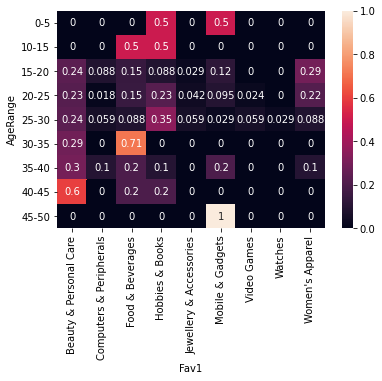

In [ ]:
sns.heatmap(mstab, annot=True)

In [ ]:
favtab = pd.crosstab(dat['Fav1'],dat['Fav2'])
favtab

Fav2,Beauty & Personal Care,Computers & Peripherals,Food & Beverages,Hobbies & Books,Jewellery & Accessories,Men's Wear,Mobile & Gadgets,Video Games,Watches,Women's Apparel
Fav1,,,,,,,,,,
Beauty & Personal Care,3,6,15,16,4,2,2,0,0,19
Computers & Peripherals,5,4,11,19,3,5,47,9,1,0
Food & Beverages,16,10,0,11,4,10,12,9,0,12
Hobbies & Books,21,18,9,0,2,3,23,5,0,12
Jewellery & Accessories,2,0,1,3,0,0,2,0,0,2
Men's Wear,0,2,6,6,0,0,4,1,1,0
Mobile & Gadgets,8,18,8,15,0,5,0,11,1,3
Video Games,2,16,4,13,0,2,2,1,1,0
Watches,1,1,0,1,0,0,0,1,0,0


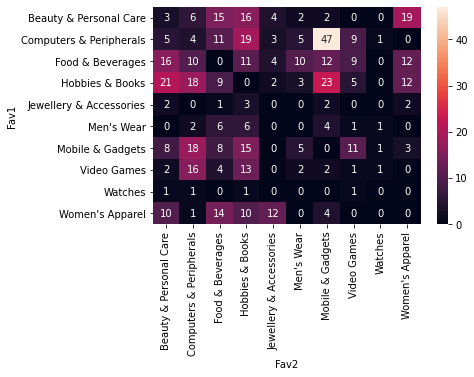

In [ ]:
sns.heatmap(favtab,annot=True)